Based on : https://github.com/kriswiner/MPU6050/wiki/Simple-and-Effective-Magnetometer-Calibration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#clean the input stream of data into seperate stream for each axis
f = open('mag_cal_data_three_axis.txt', 'r')
content = f.read()
processed_content = content.replace("\n"," ")
processed_content = processed_content.split()
list_int = [int(x) for x in processed_content]
x_list = []
y_list = []
z_list = []
for i in range(len(list_int)):
  if i%3 == 0:
    x_list.append(list_int[i])
  elif i%3 == 1:
    y_list.append(list_int[i])
  elif i%3 == 2:
    z_list.append(list_int[i])

In [3]:
print(x_list)
print(y_list)
print(z_list)

[568, 563, 607, 573, 456, 605, 662, 526, 448, 401, 528, 693, 393, 636, 513, 435, 388, 343, 286, 220, 241, 358, 173, 111, 215, 191, 388, 393, 288, 532, 356, 111, -121, 278, 485, 155, 640, -55, -58, 387, 581, 453, 480, 540, 568, 430, 1241, 1303, -168, -1168, -95, 1231, 1528, 1275, -351, -1063, 320, 1521, 980, 613, 568, 568, 432, 836, 1267, -333, 901, 1152, -408, 645, 1325, 403, -1, 1330, 602, -223, 810, 1092, -40, 453, 1226, -228, 401, 1173, -228, 573, 628, 372, 1370, 210, 592, 1246, -47, 1001, 286, 111, 865, 1246, -277, 707, 1288, -188, 722, 1066, -226, 585, 1136, -631, 220, 330, 487, 356, 332, 358, 398, 633, 442, 283, -595, -495, 1150, 1343, -571, -971, 645, 497, 356, 497, 568, 583, -176, 87, 1183, -338, 401, 655, -693, 1037, 260, -650, 1202, 702, 315, 205, 202, -162, -298, 667, -241, 466, -492, 668, -40, 278, -333, 537, 408, -248, 356, 3, 207, -155, 442, 618, -336, 578, 563, 576, 571, 631, 157, 202, 202, 217, 226, 220, 223, 228, 236, 291, -275, -320, -341, -346, -341, -662, -1363, -14

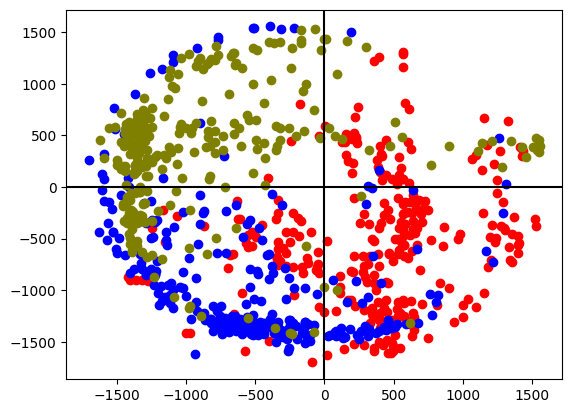

In [4]:
x = np.array(x_list)
y = np.array(y_list)
z = np.array(z_list)
plt.scatter(x,y,color = 'red')
plt.scatter(y,z,color = 'blue')
plt.scatter(z,x,color = 'olive')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.show()

In [5]:
x_max = np.max(x)
x_min = np.min(x)
y_max = np.max(y)
y_min = np.min(y)
z_max = np.max(z)
z_min = np.min(z)
print(x_max,x_min,y_max,y_min,z_max,z_min)

1528 -1420 1313 -1700 1556 -1618


In [6]:
x_scale = (x_max - x_min)/2
y_scale = (y_max - y_min)/2
z_scale = (z_max - z_min)/2
avg_scale = (x_scale + y_scale + z_scale)/3
print(x_scale,y_scale,z_scale,avg_scale)

1474.0 1506.5 1587.0 1522.5


In [7]:
scale_x = avg_scale/x_scale
scale_y = avg_scale/y_scale
scale_z = avg_scale/z_scale
print(scale_x,scale_y,scale_z)

1.0329036635006785 1.010620643876535 0.9593572778827977


In [8]:
bias_x = (x_max + x_min)/2
bias_y = (y_max + y_min)/2
bias_z = (z_max + z_min)/2
print(bias_x,bias_y,bias_z)

54.0 -193.5 -31.0


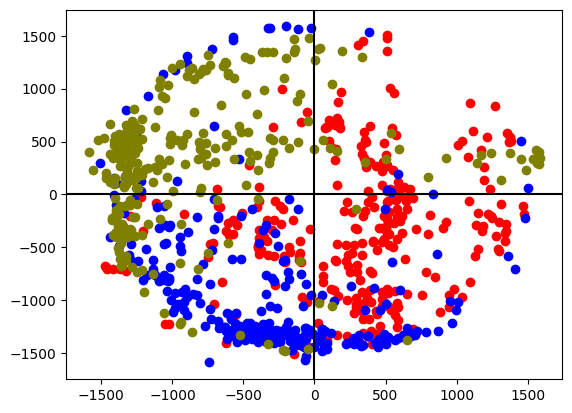

In [9]:
cal_x = (x - bias_x)
cal_y = (y - bias_y)
cal_z = (z - bias_z)
plt.scatter(cal_x,cal_y,color = 'red')
plt.scatter(cal_y,cal_z,color = 'blue')
plt.scatter(cal_z,cal_x,color = 'olive')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.show()